<a href="https://colab.research.google.com/github/shihuangsheng666/comp9444/blob/main/coco_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
BASE_PATH= '/content/drive/MyDrive/COMP9444_project/data/coco2017'

!pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/COMP9444_project/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
100% 25.0G/25.0G [08:13<00:00, 75.3MB/s]
100% 25.0G/25.0G [08:14<00:00, 54.4MB/s]


In [11]:
!kaggle datasets download -d awsaf49/coco-2017-dataset -p /content/drive/My\ Drive/COMP9444_project/
!unzip /content/drive/MyDrive/COMP9444_project/coco-2017-dataset.zip -d /content/drive/MyDrive/COMP9444_project/data

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000139.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000285.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000632.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000724.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000776.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000785.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000802.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000872.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000000885.jpg  
  inflating: /content/drive/MyDrive/COMP9444_project/data/coco2017/val2017/000000001000.jpg  
  inflating: /content/drive/MyDri

In [21]:
#!rm -r /content/coco2017

In [19]:
with open(f'{BASE_PATH}/annotations/captions_train2017.json', 'r') as f:
    data = json.load(f)
    data = data['annotations']

img_cap_pairs = []
for sample in data:
    img_name = '%012d.jpg' % sample['image_id']
    img_cap_pairs.append([img_name, sample['caption']])

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption'])
captions['image'] = captions['image'].apply(
    lambda x: f'{BASE_PATH}/train2017/{x}')

In [21]:
captions['caption']

0         A bicycle replica with a clock as the front wh...
1         A room with blue walls and a white sink and door.
2         A car that seems to be parked illegally behind...
3         A large passenger airplane flying through the ...
4         There is a GOL plane taking off in a partly cl...
                                ...                        
591748    a slice of bread is covered with a sour cream ...
591749    A long plate hold some fries with some sliders...
591750         Two women sit and pose with stuffed animals.
591751    White Plate with a lot of guacamole and an ext...
591752        A dinner plate has a lemon wedge garnishment.
Name: caption, Length: 591753, dtype: object

In [17]:
captions = captions.sample(1)
display(captions)
path0=captions.iloc[0,0]
text0=captions.iloc[0,1]

,image,caption
484390,/content/drive/MyDrive/COMP9444_project/data/c...,A plate of cheesecake and a cup with cappuccino.


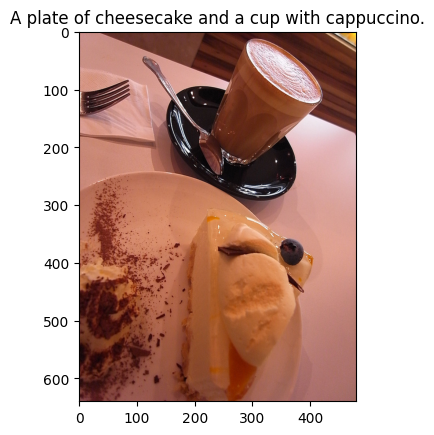

A plate of cheesecake and a cup with cappuccino.


In [16]:
img = cv2.imread(path0)
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(text0)
plt.show()
print(text0)